# Baseball Case Study
problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
# To start, we will import some libraries that will allow us to explore the dataset and its features.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Above I have fetched dataset from my local environment where I have downloded data set.

In Dataset itself we have full features name available. So I would prefer to swap names with full name just to have better understanding of data set while we will comapre all features with each other

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.rename(columns={'W' : 'Wins', 'R' : 'Runs Scored', 'AB' : 'At Bat', 'H' : 'Hits', '2B' : 'Doubles', '3B' : 'Triples',
                   'HR' : 'Home Runs', 'BB' : 'Base on Balls', 'SO' : 'Strike Outs', 'SB' : 'Stolen Base','RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 'ERA' : 'Earned Run Average', 'CG' : 'Complete Game','SHO' : 'Shut Outs', 'SV' : 'Saves', 
                   'E' : 'Errors'},  inplace=True)

In [7]:
df.head(5)

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
df.tail(5)

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


Now it gives us better view of data and I can relate coloumn names.

In [9]:
df.sample(5)

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


Samele gives us random rows of data so that we can see random inforamtion instaed of head tail

Reviewing the dataset, it seems objects are not available. This means we don't need to apply encoding techniques to this dataset.

However still we should cross check types.

In [10]:
df.dtypes

Wins                    int64
Runs Scored             int64
At Bat                  int64
Hits                    int64
Doubles                 int64
Triples                 int64
Home Runs               int64
Base on Balls           int64
Strike Outs             int64
Stolen Base             int64
Runs Average            int64
Earned Runs             int64
Earned Run Average    float64
Complete Game           int64
Shut Outs               int64
Saves                   int64
Errors                  int64
dtype: object

Finally we got confirmation about datatypes and there is no objects are available

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

Again above we can see multiple information about dataset like datatype,memory used by data set and all

In [12]:
# lets check null values in the dataframe
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

<AxesSubplot:>

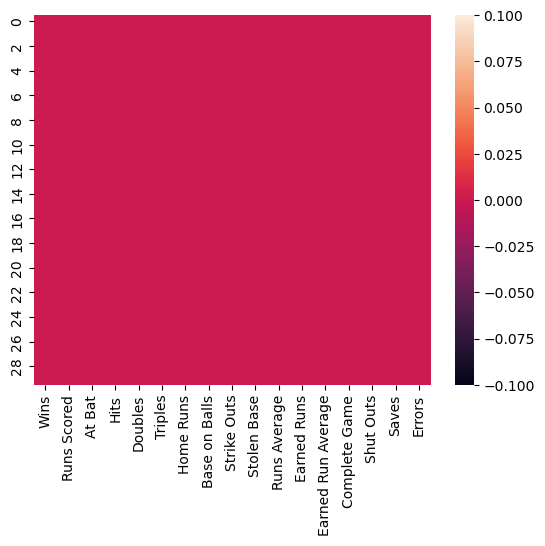

In [13]:
sns.heatmap(df.isnull())

As we dont have any null value in dataset we dont need to impute anything, we have full data available which is sign of good dataset

In [14]:
#Now we will explore more to check howmuch uniqueness we have

df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

<AxesSubplot:>

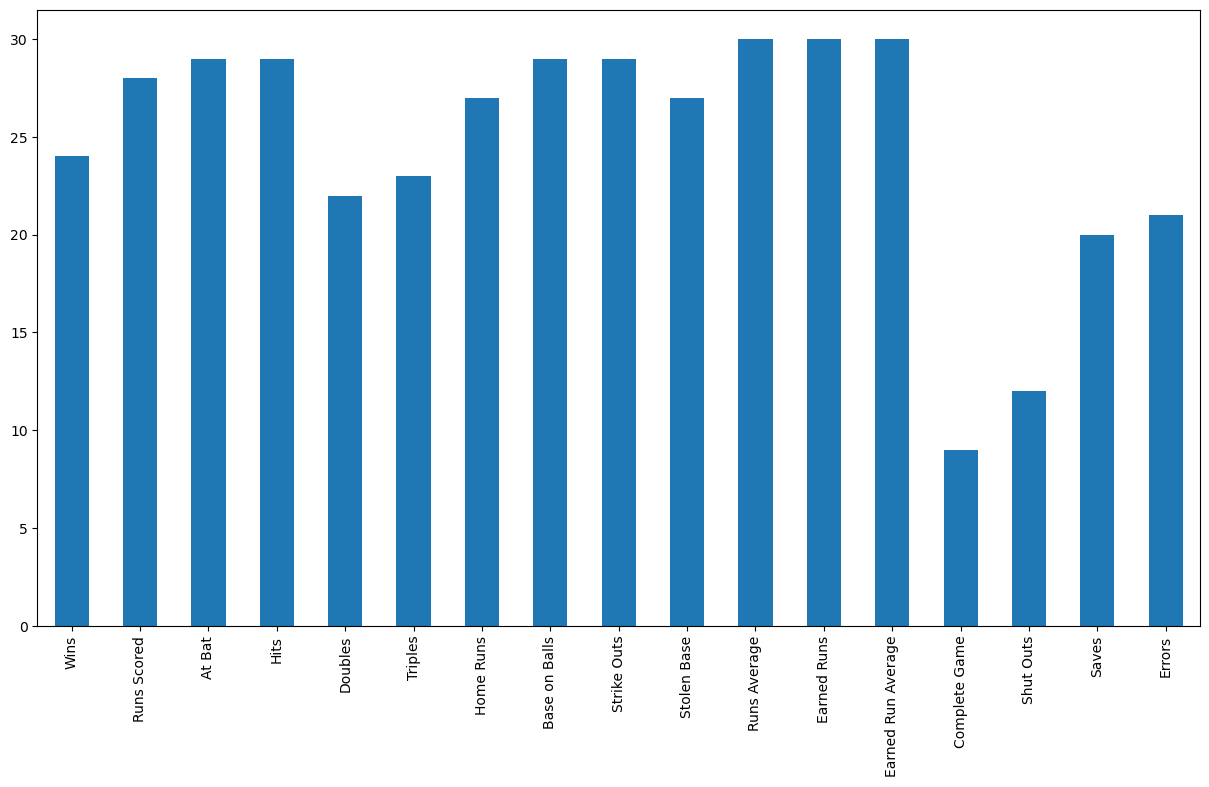

In [15]:
count = df.nunique()

plt.figure(figsize=(15,8))
count.plot(kind='bar')

we can see good uniquesness available in Dataset

In [16]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

In [17]:
#We are checking weather we have space availble in Dataset

df.loc[df['Wins']==" "]

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors


So we dont have Any space

Text(0.5, 1.0, 'Wins')

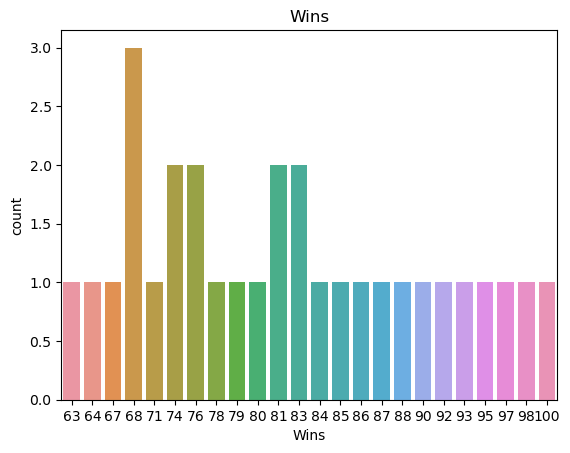

In [18]:
sns.countplot(df["Wins"])
plt.title("Wins")

We can see that 68 is having highest count and wins section and some of them are repeated twice like 74,75 and 81,83

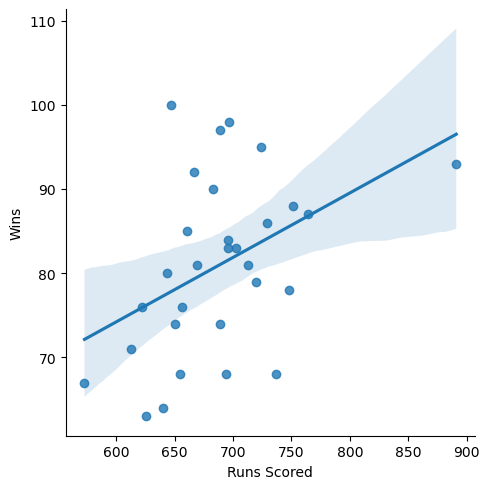

In [19]:
sns.lmplot(x="Runs Scored", y="Wins", data=df)

Runs scored has positve impact on wins as we can see line goes up when runs are increasing

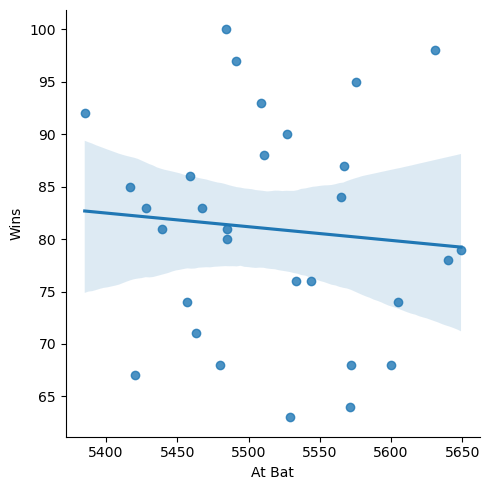

In [20]:
sns.lmplot(x="At Bat", y="Wins", data=df)

I dont see any positve or negative impact of At bat towards our target variable.

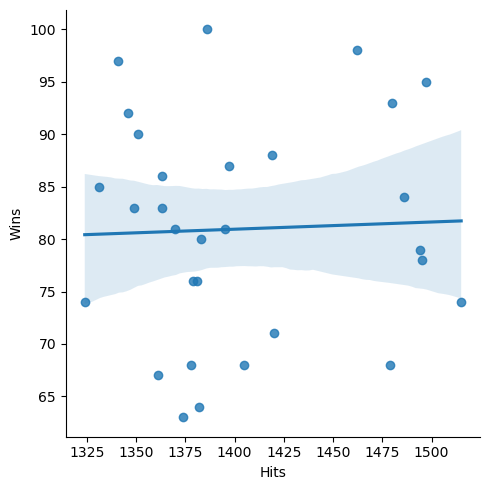

In [21]:
sns.lmplot(x="Hits", y="Wins", data=df)

We can see there is no any patter in Wins and Hits

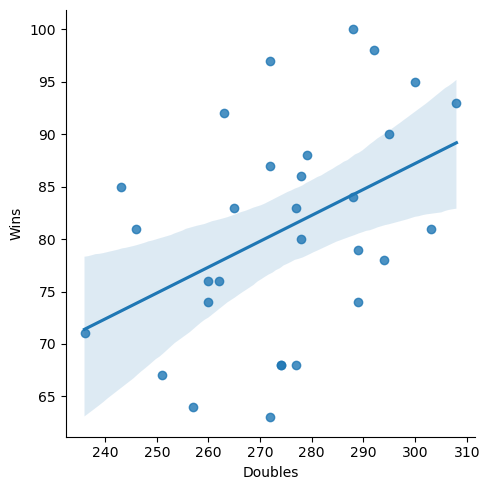

In [22]:
sns.lmplot(x="Doubles", y="Wins", data=df)

So Doubles contributing towards Wins postively

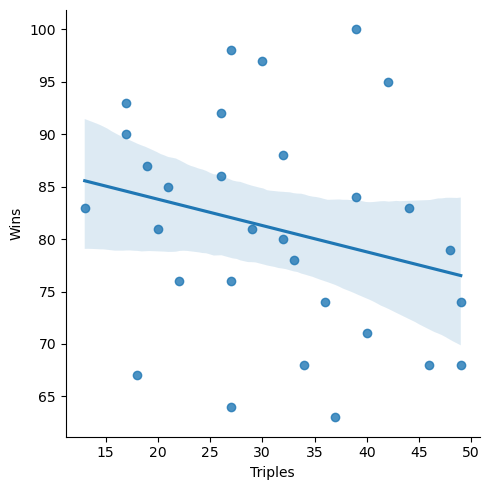

In [23]:
sns.lmplot(x="Triples", y="Wins", data=df)

We can see slighlty negative Impact of triples

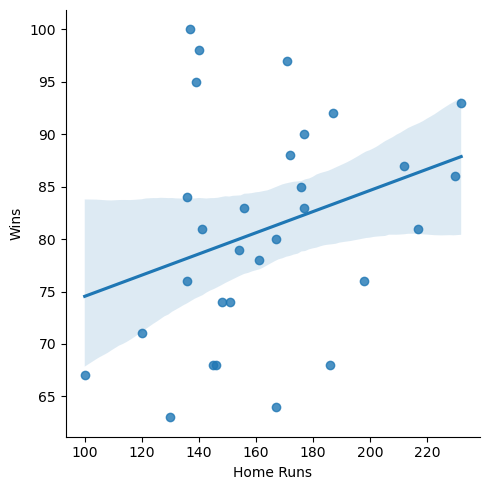

In [24]:
sns.lmplot(x="Home Runs", y="Wins", data=df)

Looks like Home Runs and Wins and some postive relation but not strong positive as we can see that 140 home runs also have 100 wins

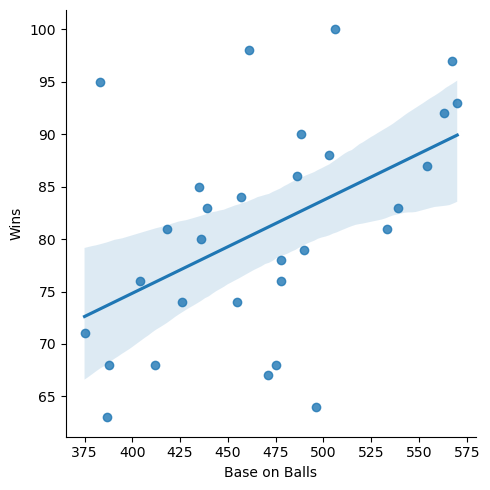

In [25]:
sns.lmplot(x="Base on Balls", y="Wins", data=df)

We can see good postive relation in Base on Balls and Wins

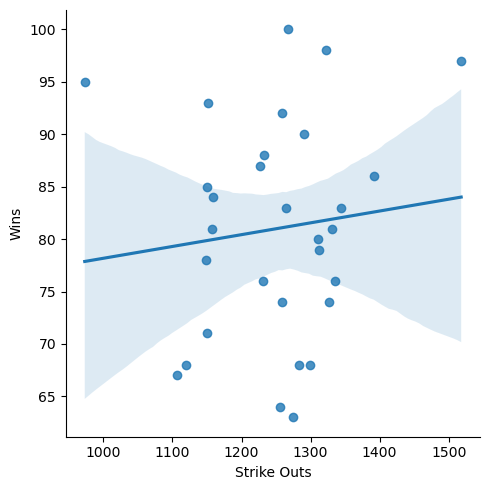

In [26]:
sns.lmplot(x="Strike Outs", y="Wins", data=df)

More of Wins and between 1200 to 1300 Strike outs so could not see and stron pattern

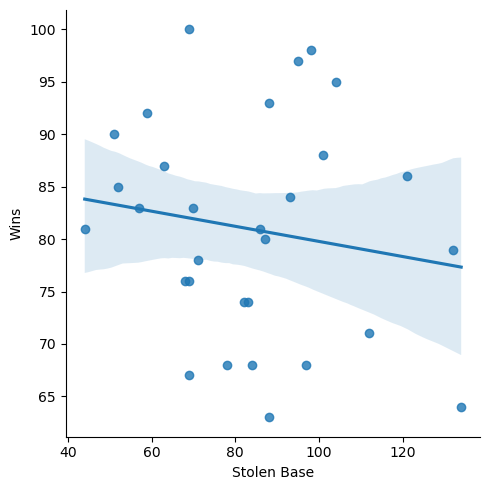

In [27]:
sns.lmplot(x="Stolen Base", y="Wins", data=df)

Stolen base have not completly negative impact but have slightly negative Impact

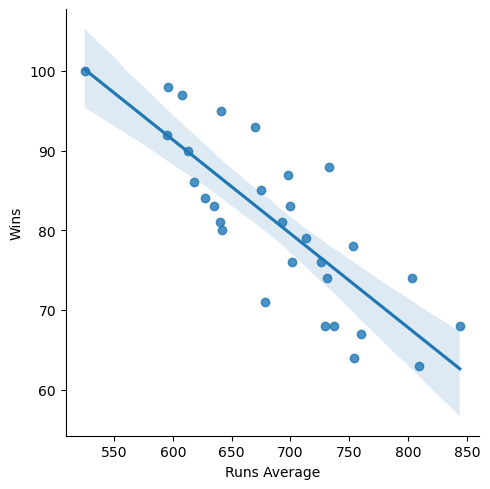

In [28]:
sns.lmplot(x="Runs Average", y="Wins", data=df)

We can see strong negativeness in raltion of Runs Average and Wins

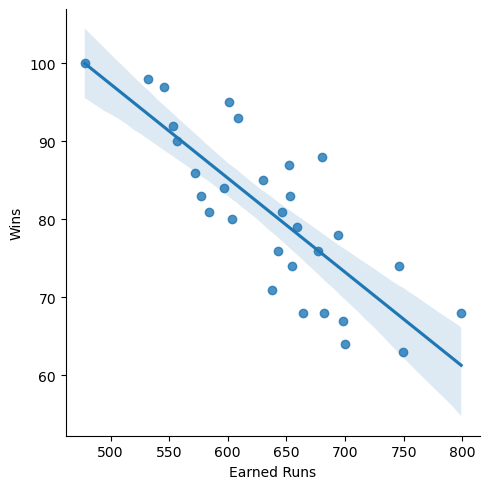

In [29]:
sns.lmplot(x="Earned Runs", y="Wins", data=df)

Again we have strong Negativeness in Earned Runs as well

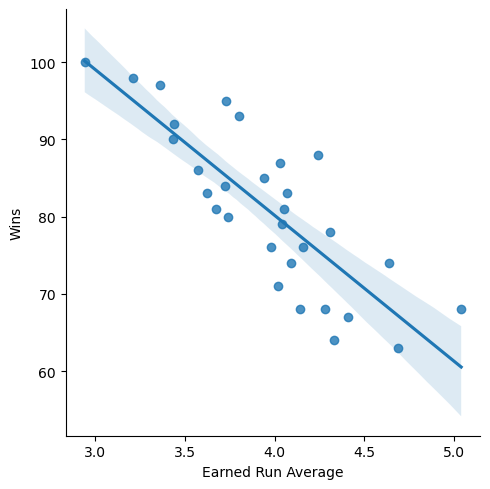

In [30]:
sns.lmplot(x="Earned Run Average", y="Wins", data=df)

Same Goes for Earned Run Average. We have negativeness

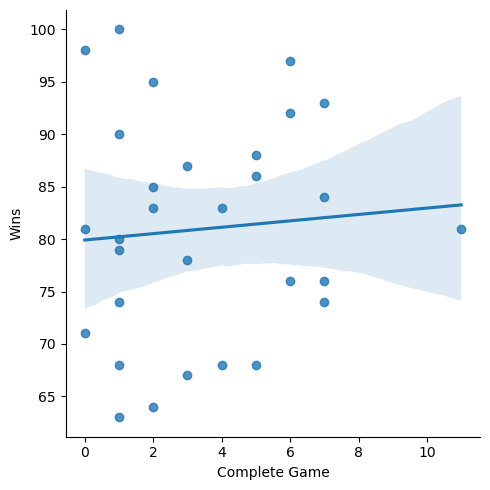

In [31]:
sns.lmplot(x="Complete Game", y="Wins", data=df)

Complete game dont have much impact on wins it is spreaded equally

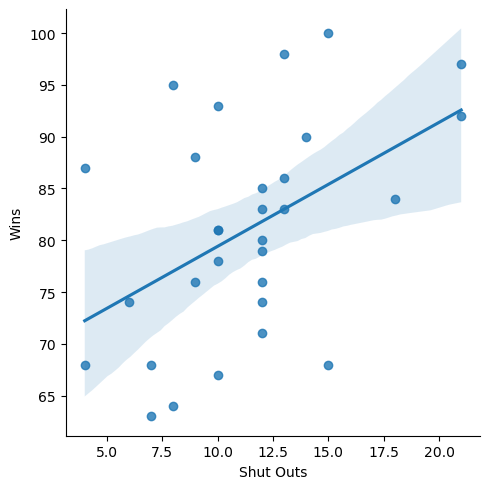

In [32]:
sns.lmplot(x="Shut Outs", y="Wins", data=df)

We have postive ralation in Shut Outs and Wins

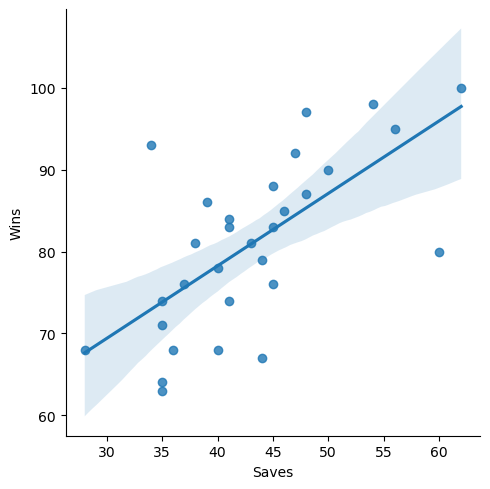

In [33]:
sns.lmplot(x="Saves", y="Wins", data=df)

Good postive raltion in saves and Wins

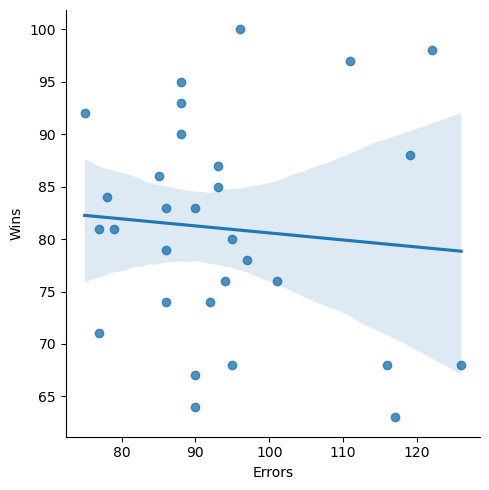

In [34]:
sns.lmplot(x="Errors", y="Wins", data=df)

Erros and wins are stable and more wins are falling in 80 to 90 Erros only

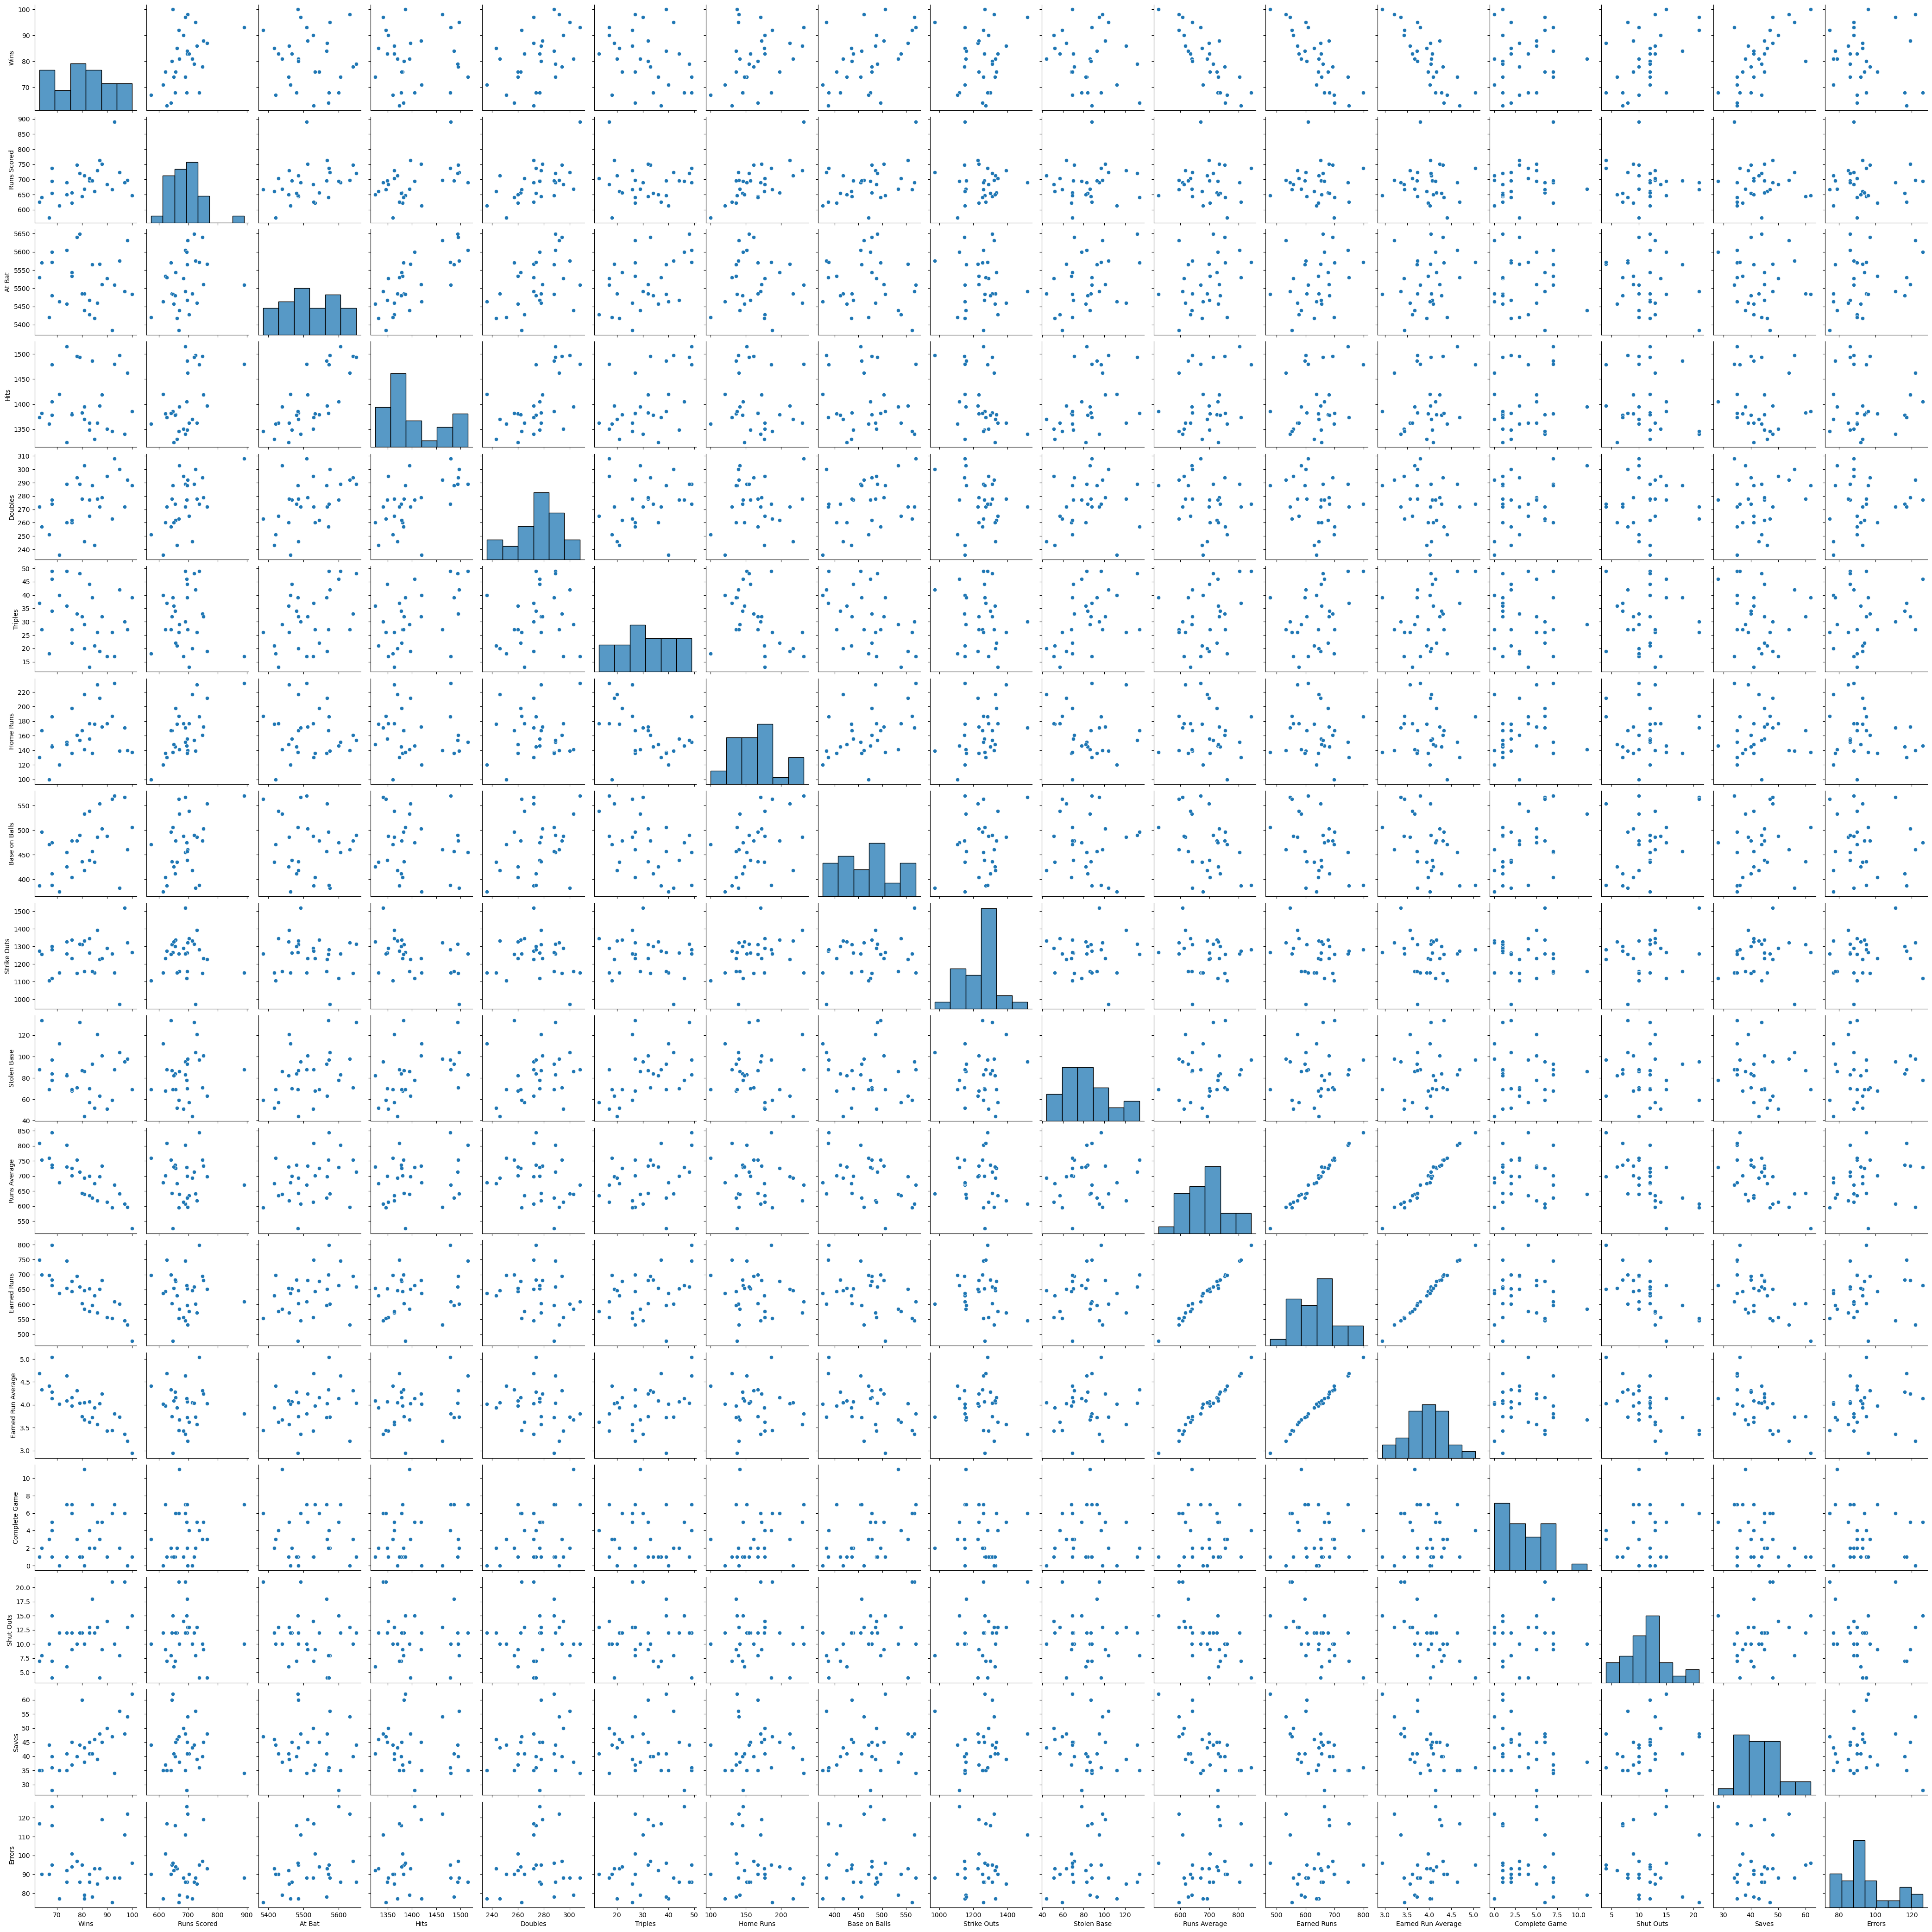

In [35]:
sns.pairplot(df)

So this above plot shows us relation of every feature with each other we can observe them closely at one plot if required

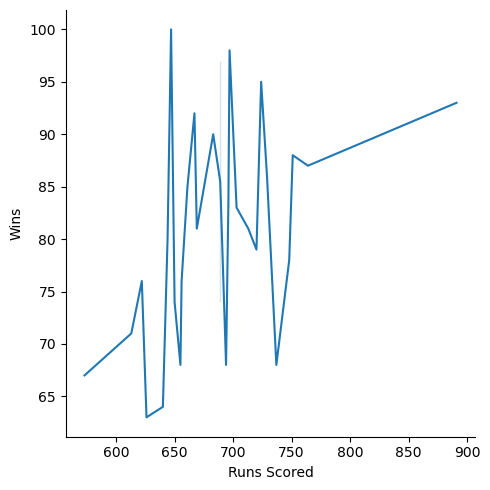

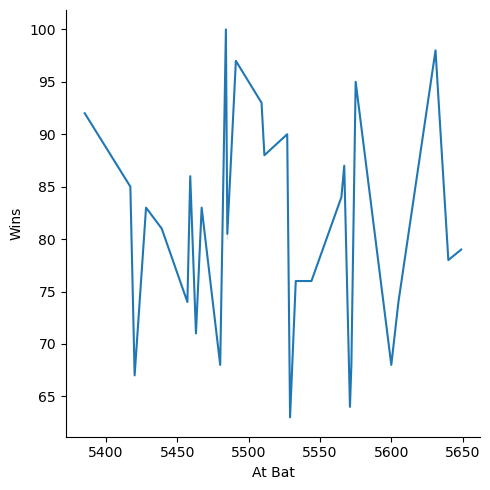

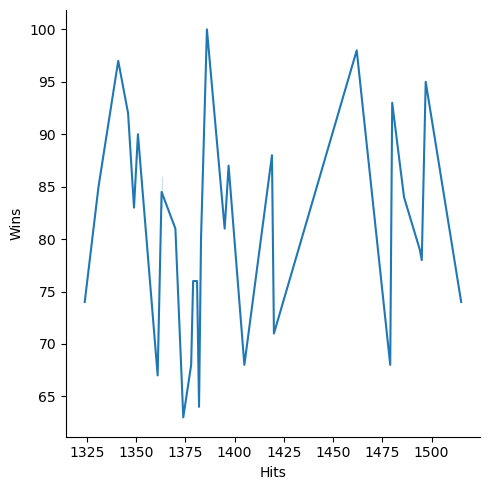

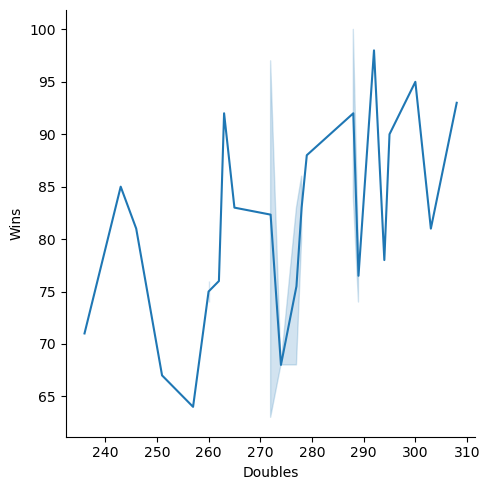

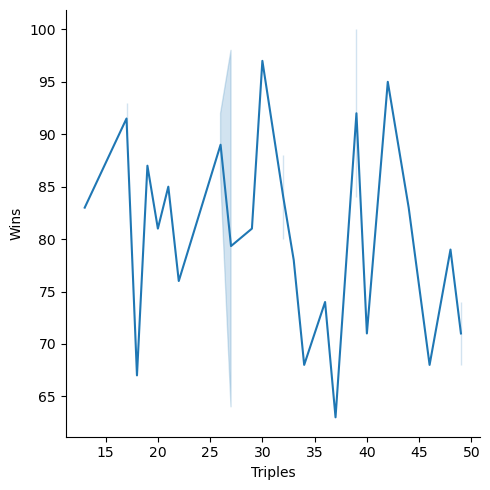

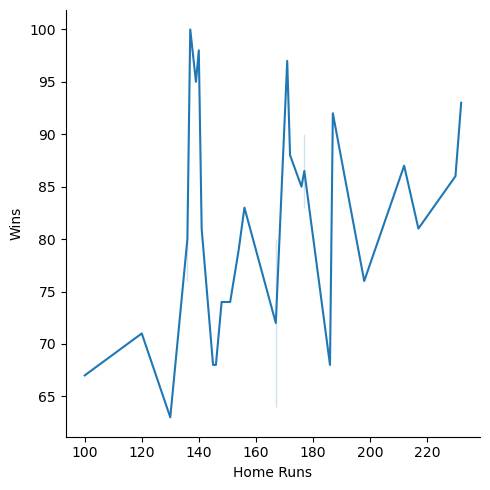

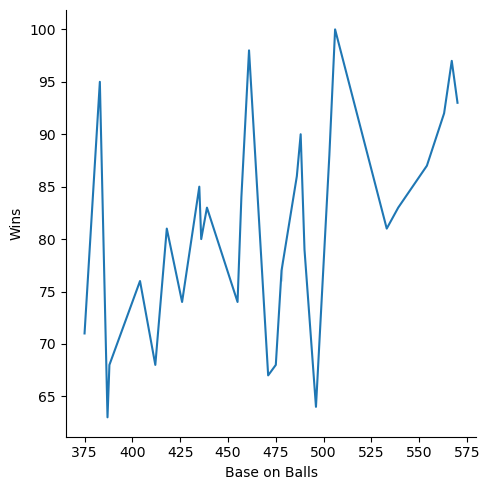

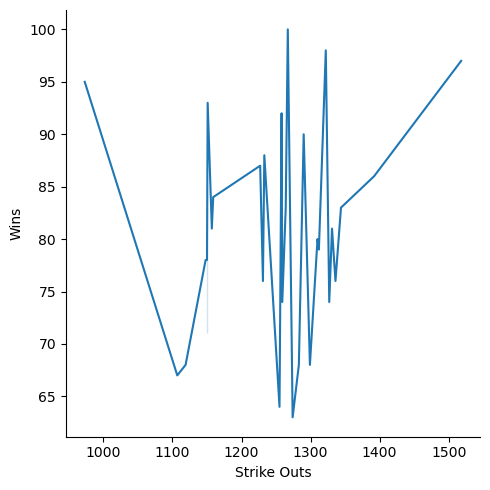

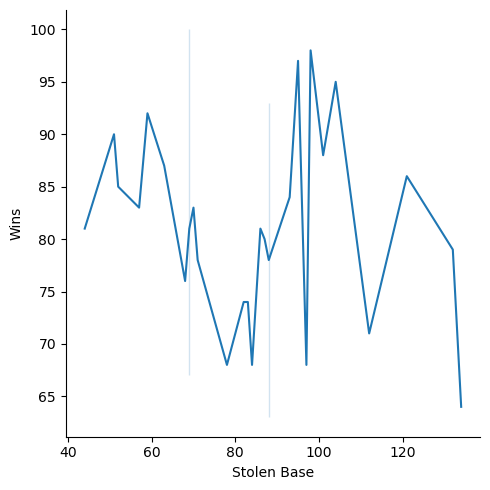

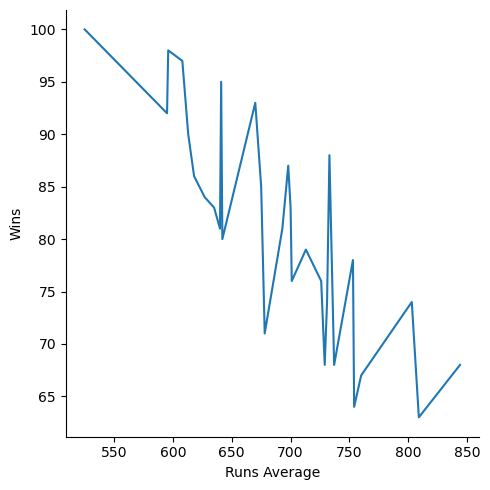

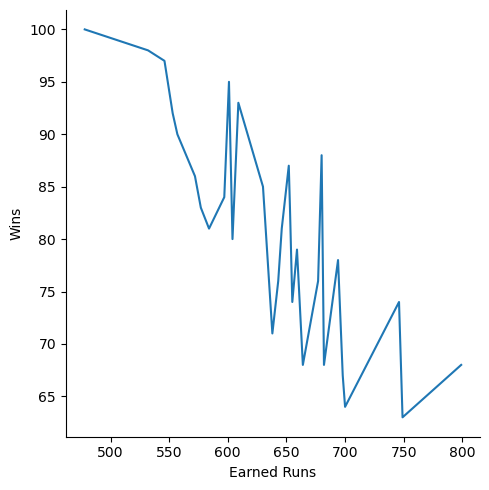

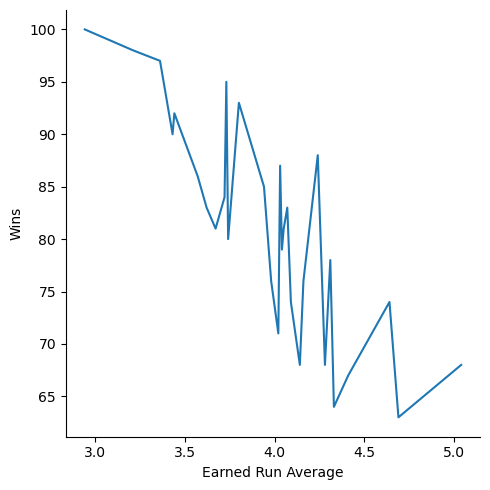

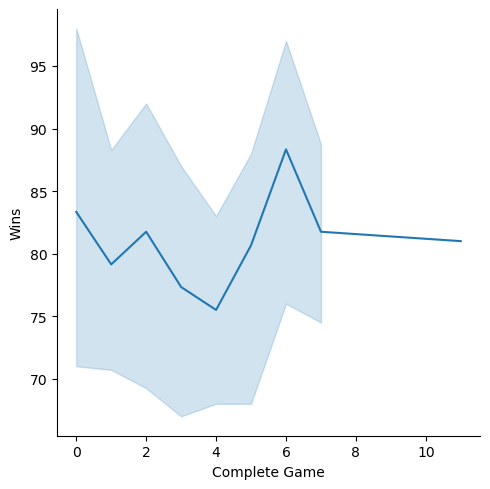

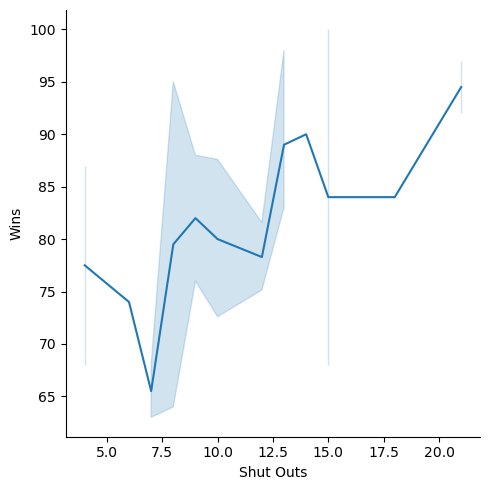

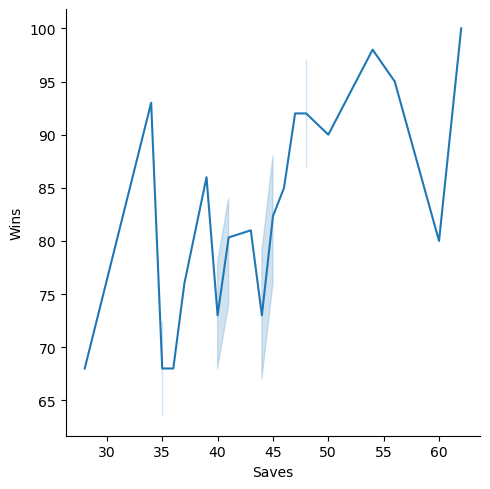

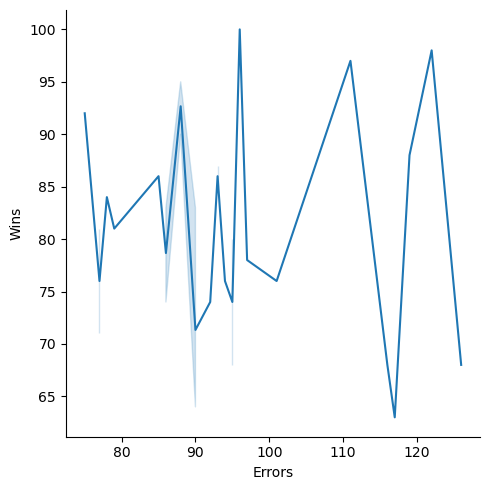

In [36]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

By analyzing the line plots for the "Wins" column, you can see each individual feature's relation to that particular output. Some features are directly proportional while others are inversely proportional.we can see here that all of our features are positively correlated with the label, with the exception of the errors.

The more runs the team scores, the greater probability of winning. The more doubles a player gets in a game, the greater probability of winning. The more triples a player gets in a game, the higher chance they have at achieving victory. The more home runs a team achieves in any one year, the greater their chances become of winning.

Earned Run and Earned Run average's lines going down from left two right so less Earned runs gives us high winning chancess.

# Descriptive statistics

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


So Above we have some basic statistics showing with T for transforming rows in columns to understand and better look

below are the some observation from above stats

1.Count show all 30 so no missings wich we have alrrwady seen in previuos charts

2.We can see percentile of wins 25% to 75 % percentile data contains 74 to 87 of win score

3.Standard deviation is 10 for wins

4.Obesarivng stats looks like data has good spread

In [38]:
# Checking correlation for all colouns

df.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


above chart shows us correlation of each feature with each other However, It is good to see correlation with target only to better understanding of features impact

<AxesSubplot:>

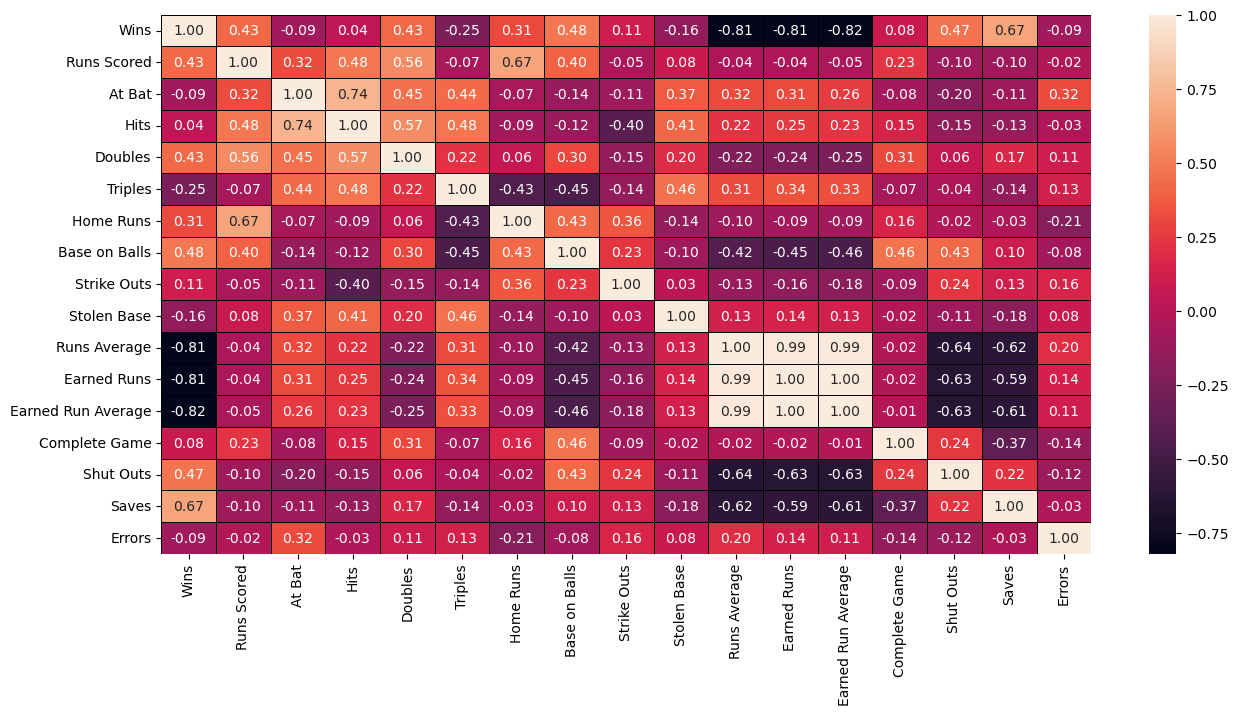

In [39]:
# we will plot all aboev values on hitmap just for good visualisation

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,linecolor="black",fmt='.2f')

Above is the heatmap of correlation which shows us good visualization with value

where Runs Average,Earned Runs,Earned Run Average show that they are highly negative correlation and Runs scores, base on Balls, Doubles shows us Highly positive correlation

In [40]:
#correlation of all columns with our target variable.

df.corr()['Wins'].sort_values()

Earned Run Average   -0.819600
Runs Average         -0.812952
Earned Runs          -0.809435
Triples              -0.251118
Stolen Base          -0.157234
Errors               -0.089485
At Bat               -0.087947
Hits                  0.037612
Complete Game         0.080533
Strike Outs           0.111850
Home Runs             0.307407
Doubles               0.427797
Runs Scored           0.430751
Shut Outs             0.471805
Base on Balls         0.484342
Saves                 0.666530
Wins                  1.000000
Name: Wins, dtype: float64

# Outliers Checking in Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

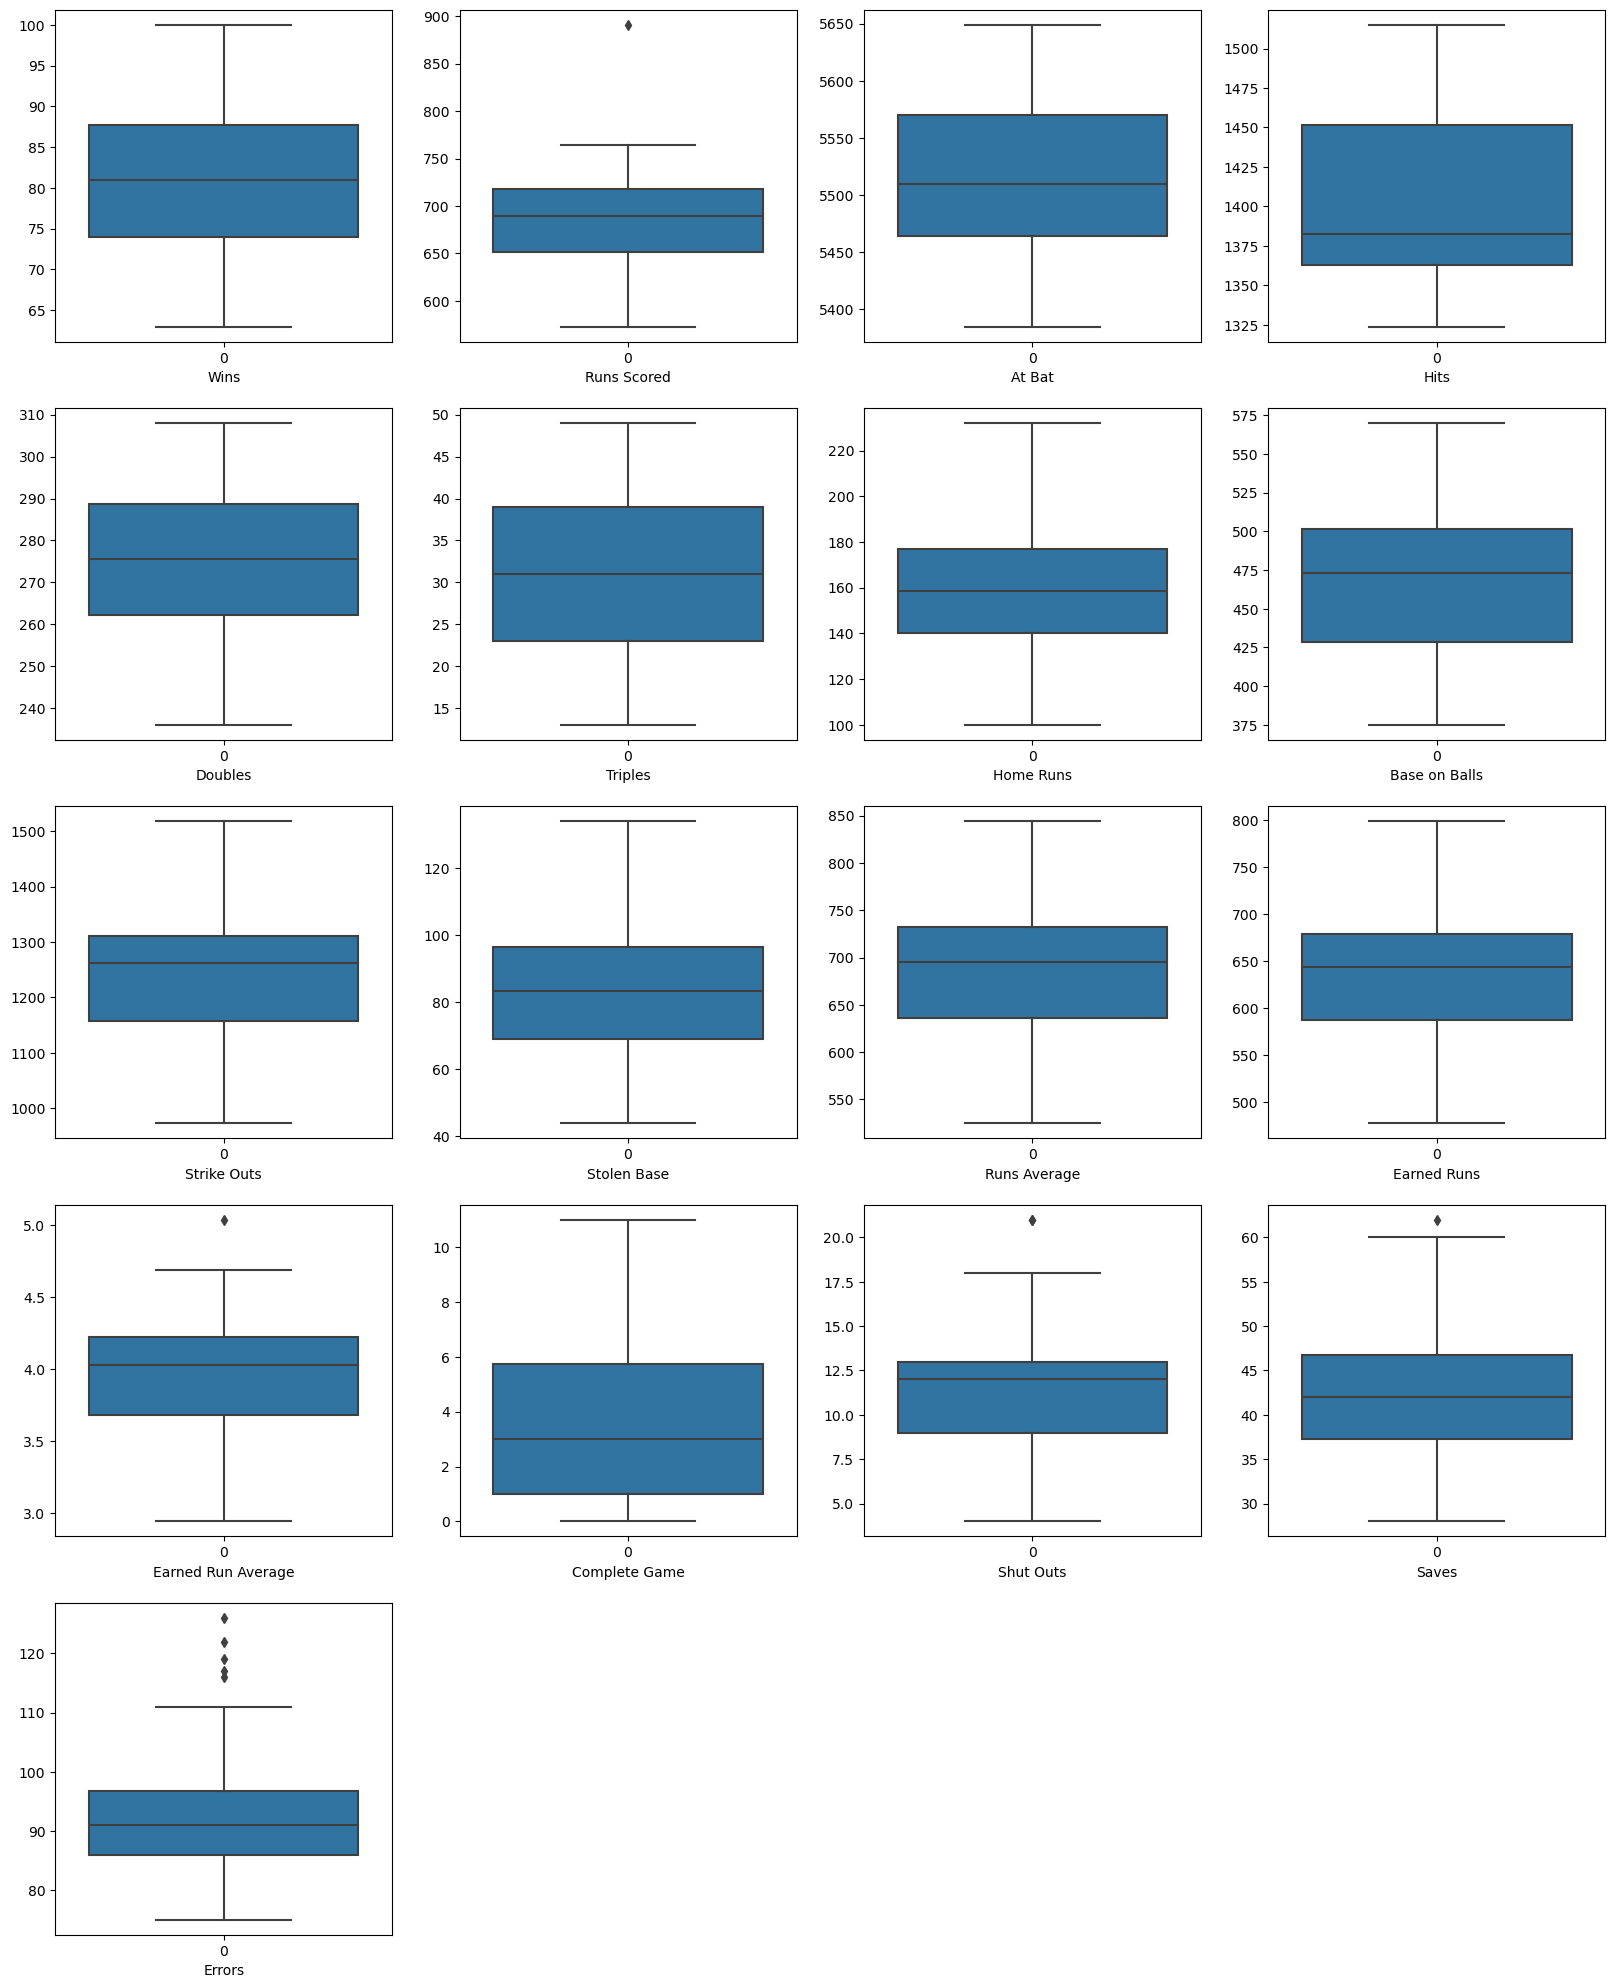

In [41]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=17:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

Outliers are present in below features

*Errors

*Shut Outs

*Earned Run Average

*saves

*Runs Scored

In [42]:
# Lets Treat outliers

from scipy.stats import zscore
zscore=zscore(df)
zabs=np.abs(zscore)

z=df[(zabs<3).all(axis=1)]

In [43]:
z.shape

(29, 17)

In [44]:
df.shape

(30, 17)

In [45]:
loss=(30-29)/30*100
loss

3.3333333333333335

3.3% loss we can accept

In [46]:
dropindex=df.index.difference(z.index)
dropindex

Int64Index([5], dtype='int64')

In [47]:
df.drop(dropindex,inplace=True)
df

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


<function matplotlib.pyplot.show(close=None, block=None)>

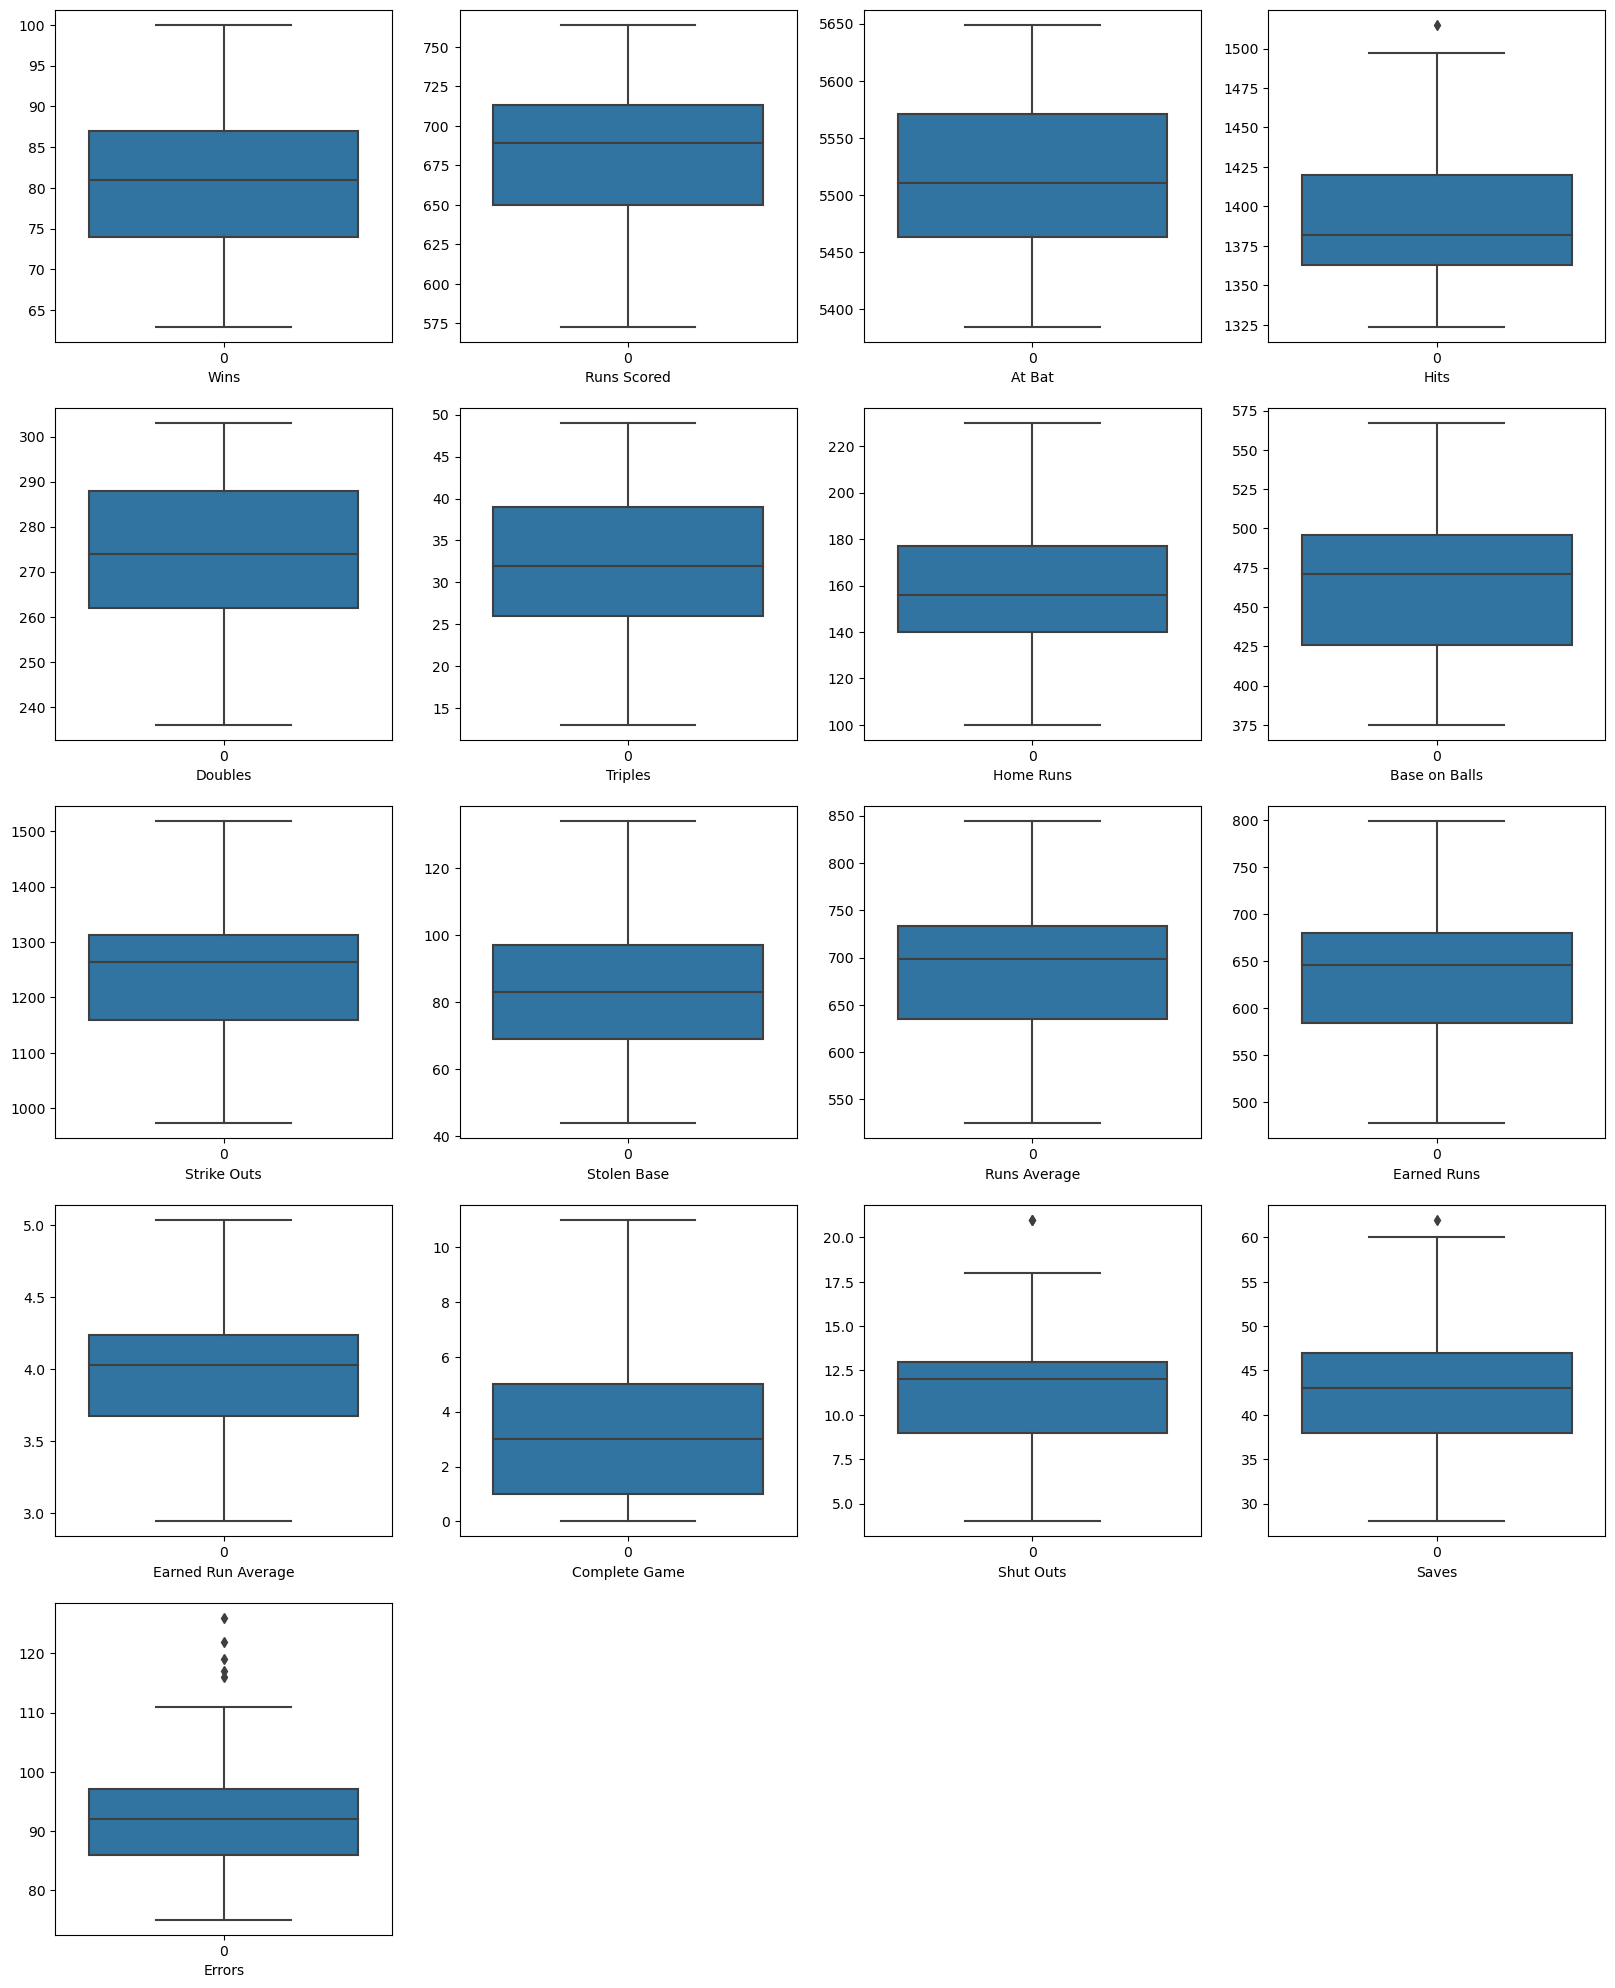

In [48]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=17:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

Ok so now we are good with outliers

# We should check skewness of data before processing

In [49]:
df.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

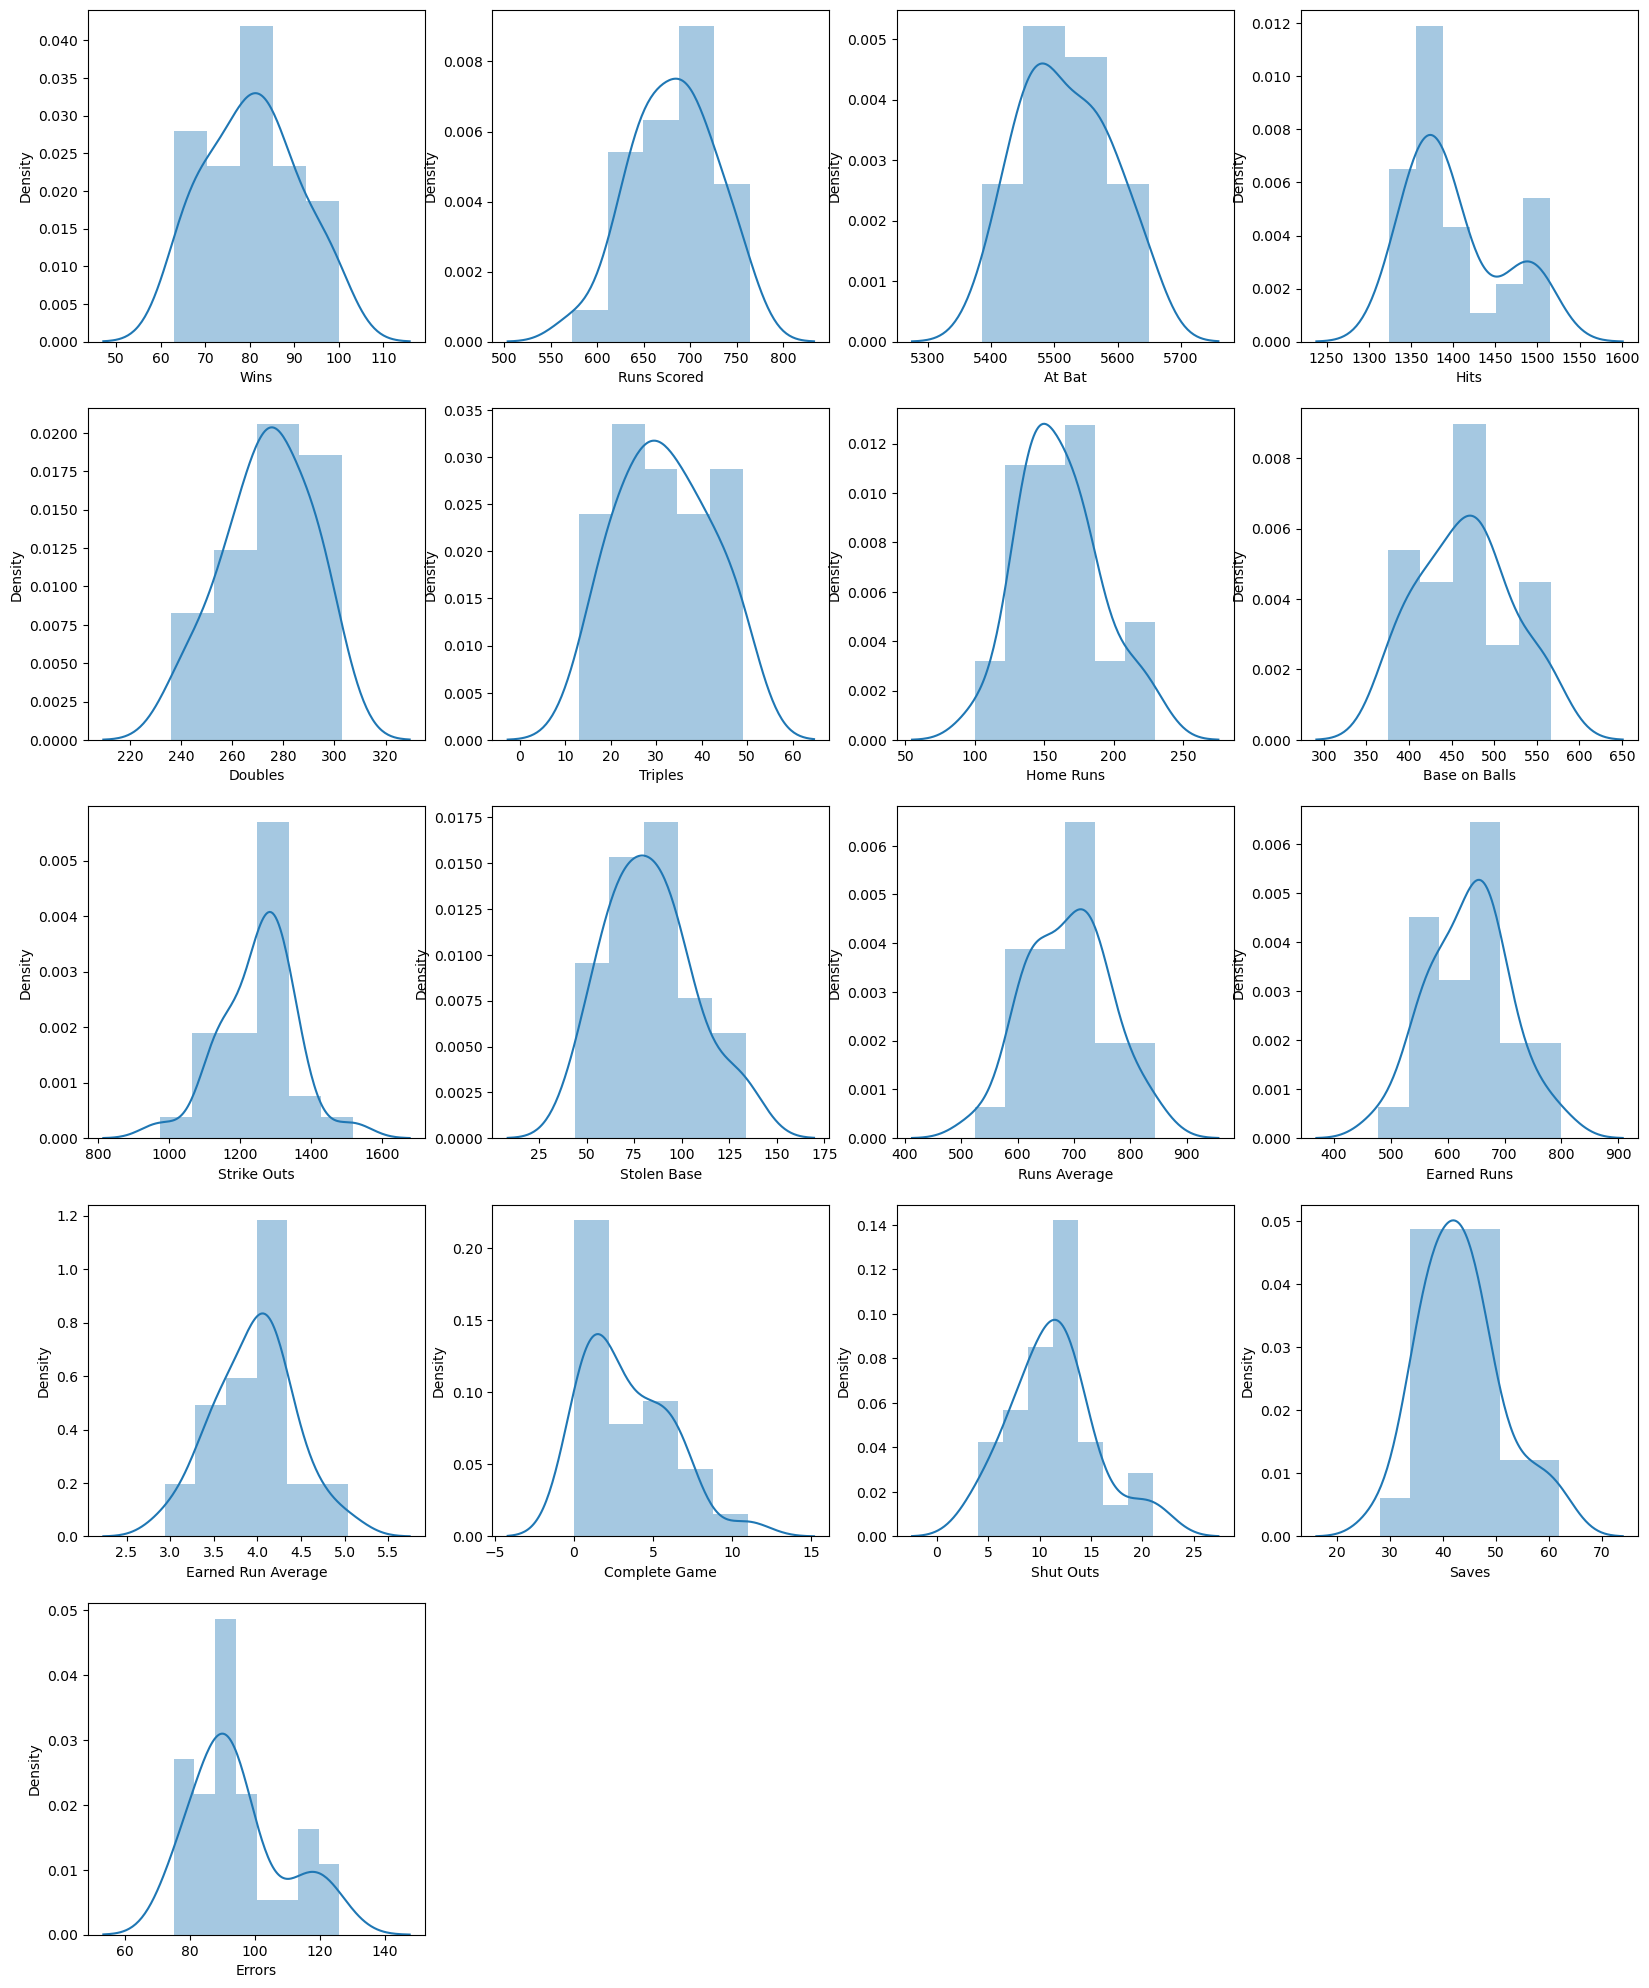

In [50]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=17:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

Loking at the above graphs we can see that Complete Game has Highest Skewness then saves has second highest

In [51]:
# I will drop "Complete Game" and "Hits" Due to two reasons 1. They have very less correlationa and 2. they are skewed as well so better to drop

df.drop('Complete Game',axis=1, inplace=True)
df.drop('Hits',axis = 1, inplace=True)
df.head()

,Wins,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Shut Outs,Saves,Errors
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


# Removing Skewness using yeo-johnson method

In [52]:
skewed_features = ['Shut Outs','Saves','Errors']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')
df[skewed_features] = scale.fit_transform(df[skewed_features].values)
df[skewed_features].head()

,Shut Outs,Saves,Errors
0,-0.787002,1.532753,-0.348265
1,0.236737,0.312020,-0.540820
2,-0.252844,-0.664137,-1.326125
3,-0.513555,-0.820689,0.650818
4,0.236737,-1.149165,-0.540820


In [53]:
df.head()

,Wins,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Shut Outs,Saves,Errors
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,-0.787002,1.532753,-0.348265
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,0.236737,0.312020,-0.540820
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,-0.252844,-0.664137,-1.326125
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,-0.513555,-0.820689,0.650818
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,0.236737,-1.149165,-0.540820


In [54]:
df.shape

(29, 15)

Checkinng Skewness after removing it

<function matplotlib.pyplot.show(close=None, block=None)>

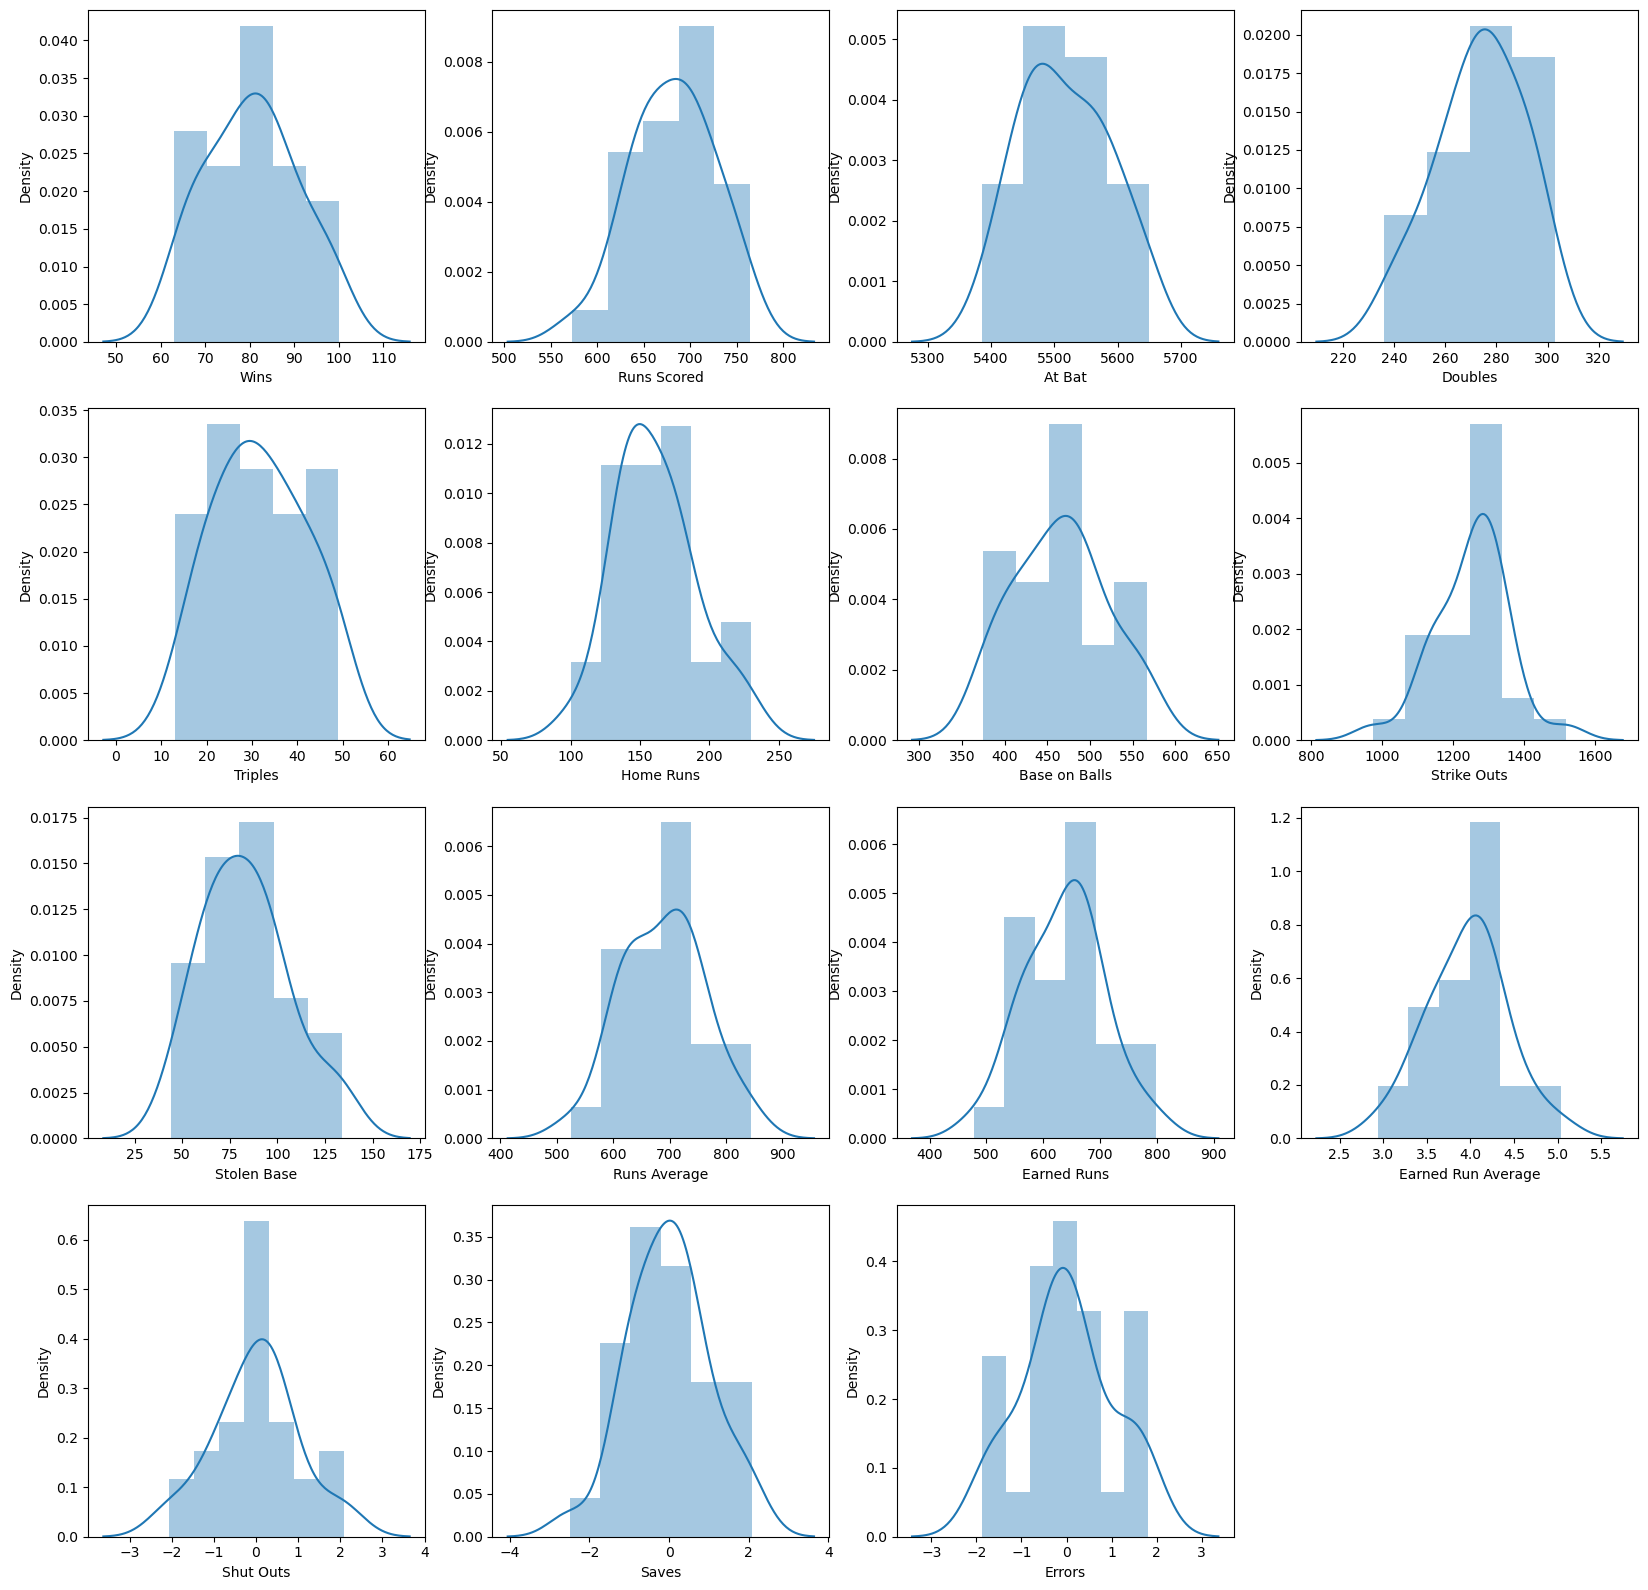

In [55]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=15:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

So now we can see all featurnes are showing in bell curve shape which is desired output from handling skewness

# We are ready to define X and Y now as we handled outliers and skewness both

In [56]:
x = df.drop('Wins', axis=1)
y = df['Wins']
x.shape

(29, 14)

In [57]:
y.shape

(29,)

# Standerdization of data

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


# We will check and handle multicolinarity using VIF

In [59]:
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Doubles', 'Triples', 'Home Runs',
       'Base on Balls', 'Strike Outs', 'Stolen Base', 'Runs Average',
       'Earned Runs', 'Earned Run Average', 'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

In [60]:
Columnsname=['Runs Scored', 'At Bat', 'Doubles', 'Triples', 'Home Runs',
       'Base on Balls', 'Strike Outs', 'Stolen Base', 'Runs Average',
       'Earned Runs', 'Earned Run Average', 'Shut Outs', 'Saves', 'Errors']

In [61]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=Columnsname
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Runs Scored,6.219825
1,At Bat,9.828077
2,Doubles,2.683572
3,Triples,3.196853
4,Home Runs,7.369072
5,Base on Balls,2.686472
6,Strike Outs,2.741072
7,Stolen Base,1.757901
8,Runs Average,179.096825
9,Earned Runs,1754.643859


I can see that we have multicolinarity exist in Earned Runs so we will drop it.

In [62]:
x.drop('Earned Runs',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,4.352902,Runs Scored
1,3.177214,At Bat
2,2.597985,Doubles
3,3.072775,Triples
4,4.949255,Home Runs
5,2.561982,Base on Balls
6,2.661842,Strike Outs
7,1.680467,Stolen Base
8,119.939744,Runs Average
9,111.859162,Earned Run Average


I Prefer to drop Runs Average as well

In [63]:
x.drop('Runs Average',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,4.250076,Runs Scored
1,2.238746,At Bat
2,2.597917,Doubles
3,3.030073,Triples
4,4.562014,Home Runs
5,2.222720,Base on Balls
6,2.042786,Strike Outs
7,1.568151,Stolen Base
8,3.878177,Earned Run Average
9,2.651314,Shut Outs


Now we are good to process further.

In [64]:
print(x.shape)
print(y.shape)

(29, 12)
(29,)


# Before processing we will find best random state which gives us highest accuracy

In [65]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [66]:
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8398079120879121 on Random State: 4


Best Accuracy is: 0.7882425788497217 on Random State: 94

We Found 94 random state which has 0.78 Accuracy approx

In [68]:
dt=DecisionTreeRegressor()
kn=KNeighborsRegressor()
adb=AdaBoostRegressor()
gdb=GradientBoostingRegressor()
lnr=LinearRegression()
rfr=RandomForestRegressor()
sv=SVR()
lss=Lasso(alpha=1,random_state=0)

model=[dt,kn,adb,gdb,lnr,rfr,sv,lss]

for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=94)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("RMSE Score is:",mean_squared_error(y_test,predi))
    r2 = r2_score(y_test, predi)*100
    print("R2 Score is:", r2)
    cv_score = (cross_val_score(i, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    print("*****************************************************************")

performance matrix of DecisionTreeRegressor() is:
RMSE Score is: 31.333333333333332
R2 Score is: 47.6808905380334
Cross Validation Score: -225.58298556218227
R2 Score - Cross Validation Score is 273.26387610021567
*****************************************************************
performance matrix of KNeighborsRegressor() is:
RMSE Score is: 43.626666666666644
R2 Score is: 27.153988868274624
Cross Validation Score: 1.3785729869268004
R2 Score - Cross Validation Score is 25.775415881347822
*****************************************************************
performance matrix of AdaBoostRegressor() is:
RMSE Score is: 15.482928240740746
R2 Score is: 74.14724412492268
Cross Validation Score: -82.98422877664026
R2 Score - Cross Validation Score is 157.13147290156294
*****************************************************************
performance matrix of GradientBoostingRegressor() is:
RMSE Score is: 14.940835614774727
R2 Score is: 75.05240806438358
Cross Validation Score: -122.49114542905477
R2

After looking at above matrx I see that only two models are wroking good 1.Liner Regression 2.Lasso However I see that Lasso has high difference between R2 score and Cross validation score Hence I would Chose Liner regression as best model.

As per theory we can not hypertune parameter for Liner Regression model so will save as it is

# Saving Final best Model

In [70]:
#saving the model 
import joblib
joblib.dump(Final_Model,'Baseball.pkl')

['Baseball.pkl']

In [71]:
loadmodel = joblib.load('Baseball.pkl')

# Predication Using saved Model

In [72]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,98,97.635231
1,83,91.071653
2,85,82.967259
3,74,64.562497
4,84,85.708327
5,76,71.918555


# Thank You